In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob

## Data Processesing

In [2]:
path = 'data/*.csv'

frames = []

# Process each file in chunks
for fname in glob.glob(path):
    chunks = pd.read_csv(fname, chunksize=500000)  
    for chunk in chunks:
        frames.append(chunk)

all_data = pd.concat(frames)

print("Data successfully loaded in chunks.")



/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/610173434.py:8: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/610173434.py:8: DtypeWarning: Columns (34,36,38,42,44,46,48,61) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/610173434.py:8: DtypeWarning: Columns (32,34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/610173434.py:8: DtypeWarning: Columns (34,36,38,42,44,46,48,61) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/610173434.py:8: DtypeWarning: Columns (34,

Data successfully loaded in chunks.


In [3]:
all_data.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,75-2921540,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3202.0,97.279999,57400.0,47.540001,710.0,1314.0,NaN
1,2017,0000504713,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3733.0,4.580000,63900.0,86.239998,861.0,1241.0,NaN
2,2017,7810600004,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,5498.0,37.919998,75400.0,63.939999,1270.0,1658.0,NaN
3,2017,42-1739728,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3566.0,11.830000,55200.0,74.290001,573.0,1261.0,NaN
4,2017,42-1739728,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,2910.0,48.660000,77500.0,79.250000,599.0,26.0,NaN


In [4]:
print(all_data.columns)

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [5]:
def map_loan_approval(action):
    if action == 1:
        return 1
    elif action in [2, 4, 5]:
        return 2
    elif action == 3:
        return 0
    else:
        return None  # All values that are dealing w/ preapproval and other inconclusive outcomes go here

all_data['loan_approval'] = all_data['action_taken'].apply(map_loan_approval)

In [6]:
all_data['action_taken_name'].value_counts()

action_taken_name
Loan originated                                        7339057
Loan purchased by the institution                      2086676
Application denied by financial institution            2009743
Application withdrawn by applicant                     1696289
File closed for incompleteness                          601148
Application approved but not accepted                   409797
Preapproval request denied by financial institution     106680
Preapproval request approved but not accepted            36106
Name: count, dtype: int64

## Race and Ethnicity Breakdown

In [7]:
all_data['applicant_ethnicity_name'].value_counts()

applicant_ethnicity_name
Not Hispanic or Latino                                                               9877958
Information not provided by applicant in mail, Internet, or telephone application    1543770
Not applicable                                                                       1520462
Hispanic or Latino                                                                   1343306
Name: count, dtype: int64

In [8]:
all_data['applicant_race_name_1'].value_counts()

applicant_race_name_1
White                                                                                9267426
Information not provided by applicant in mail, Internet, or telephone application    1641022
Not applicable                                                                       1513818
Black or African American                                                            1002556
Asian                                                                                 692059
American Indian or Alaska Native                                                      109588
Native Hawaiian or Other Pacific Islander                                              59027
Name: count, dtype: int64

/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


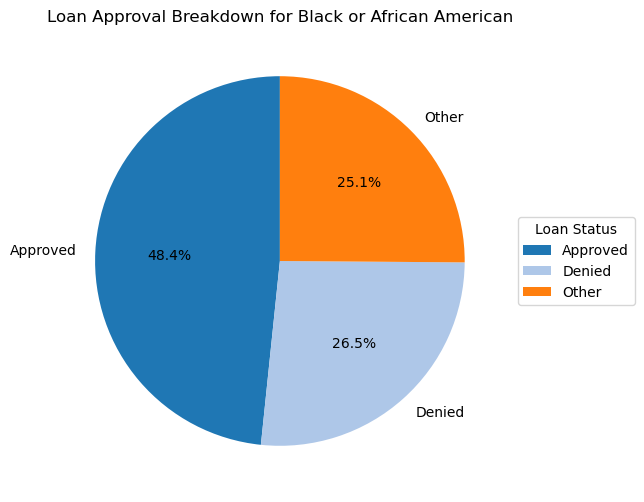

/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


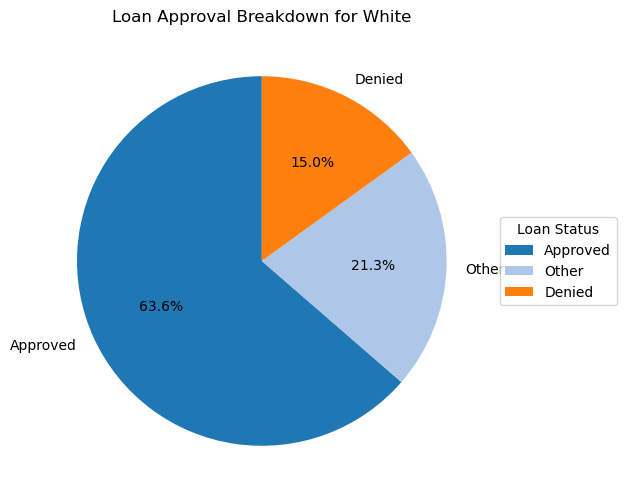

/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


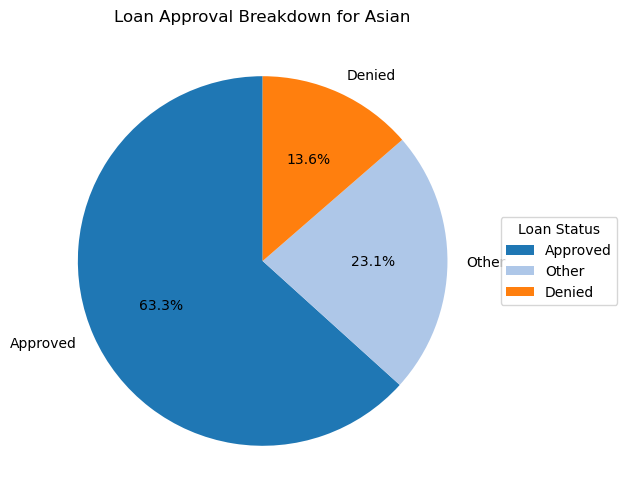

/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


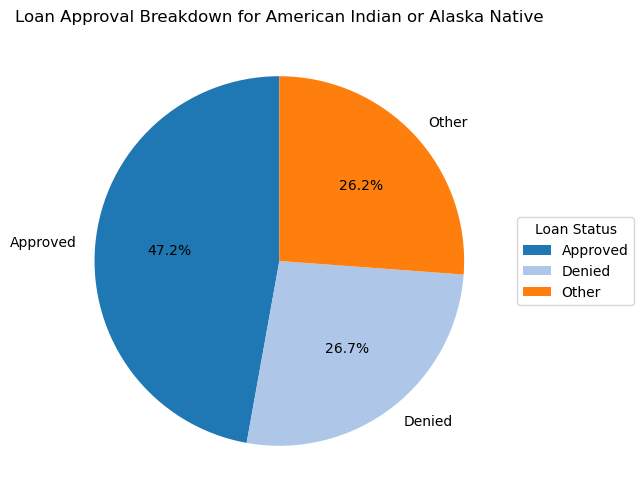

/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


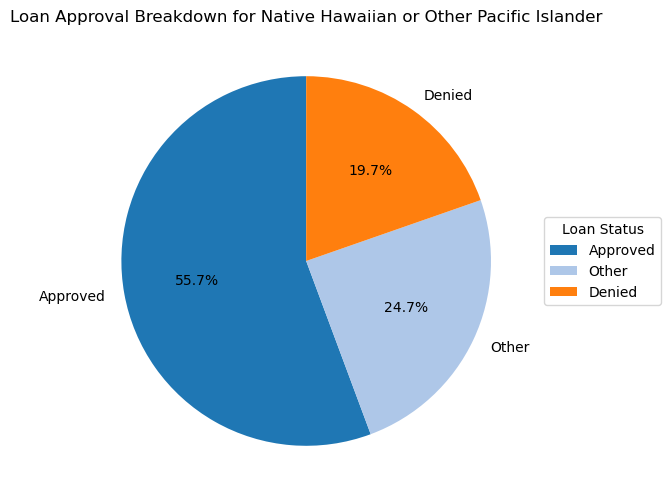

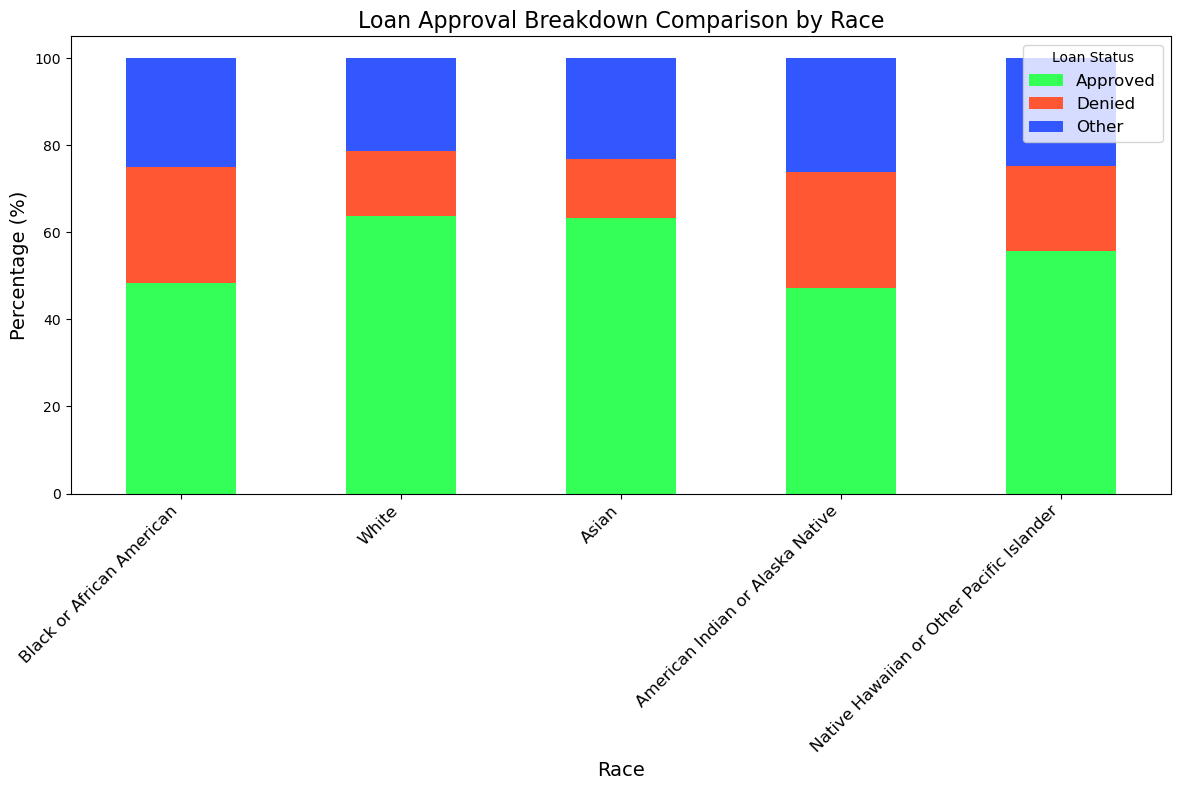

In [9]:
# Breakdown by Race
approval_labels = {0: 'Denied', 1: 'Approved', 2: 'Other'}

# Dictionary to store all races and their approval counts
race_approval_dict = {}

for race in all_data['applicant_race_name_1'].unique():
    if race in ['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable']: 
        continue
    race_data = all_data[all_data['applicant_race_name_1'] == race]
    race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)
    approval_counts = race_data['loan_approval_label'].value_counts(normalize=True) * 100

    race_approval_dict[race] = approval_counts

    # Generate pie chart for the current race
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        approval_counts, 
        labels=approval_counts.index,  # Use the mapped labels for display
        autopct='%1.1f%%', 
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Loan Approval Breakdown for {race}")
    plt.legend(wedges, approval_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

race_approval_df = pd.DataFrame(race_approval_dict).fillna(0).transpose()

# Plot a bar chart comparing all races
approval_colors = ["#33FF57", "#FF5733", "#3357FF"] 
race_approval_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=approval_colors)

plt.title("Loan Approval Breakdown Comparison by Race", fontsize=16)
plt.xlabel("Race", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Loan Status", fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()



/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/342968076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


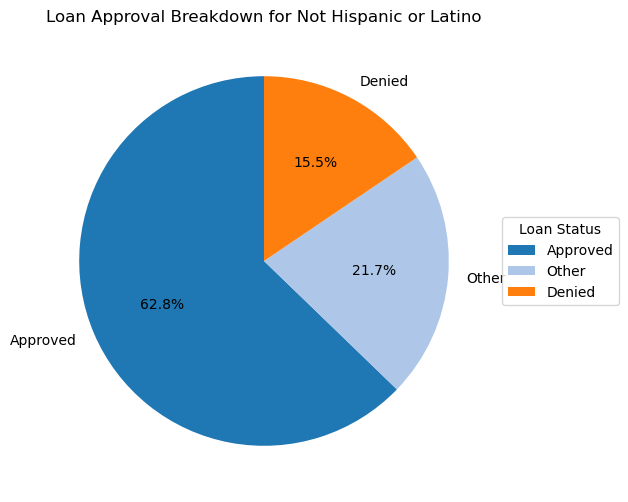

/var/folders/nr/z9nx6hvd15gdkvdx9pjzqxmm0000gn/T/ipykernel_5675/342968076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


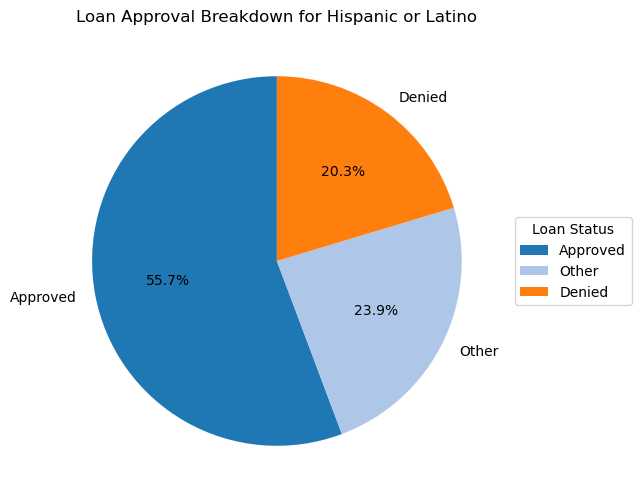

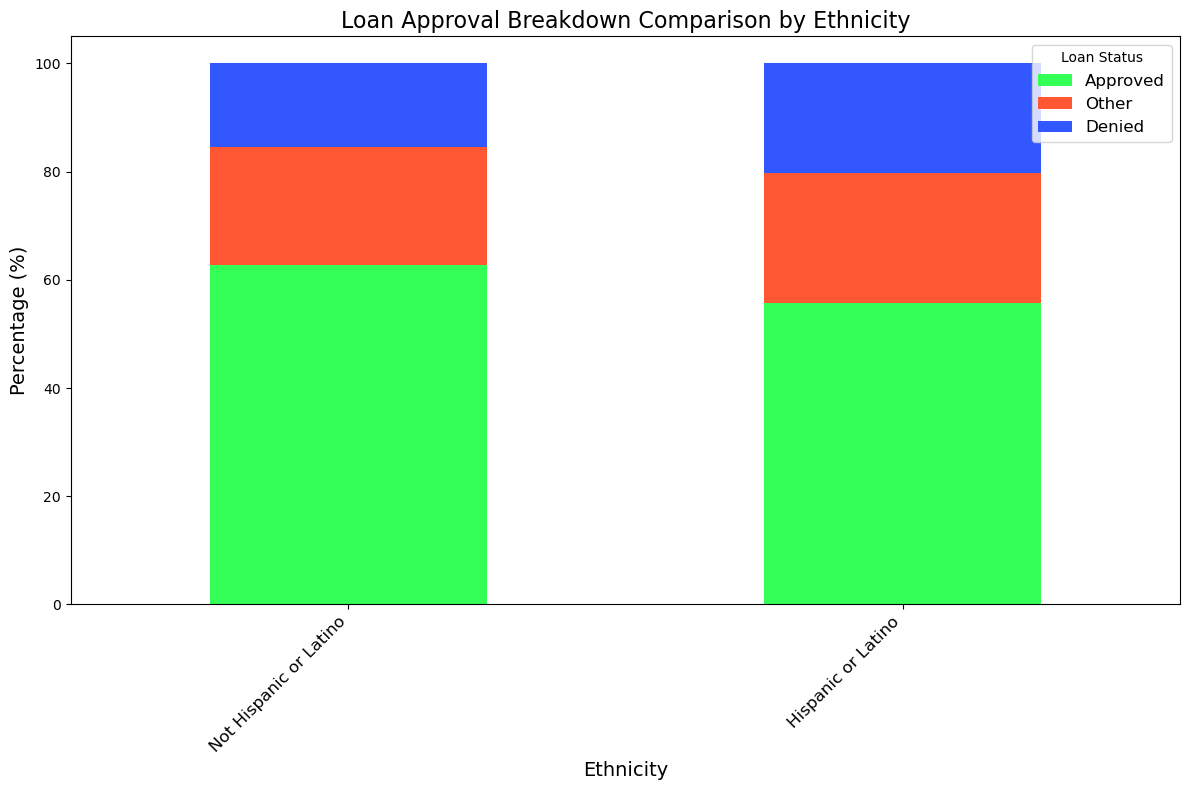

In [10]:
# Ethnicity Breakdown
approval_labels = {0: 'Denied', 1: 'Approved', 2: 'Other'}

# Dictionary to store all ethnicities and their approval counts
ethnicity_approval_dict = {}

for eth in all_data['applicant_ethnicity_name'].unique():
    if eth in ['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable']:
        continue
    eth_data = all_data[all_data['applicant_ethnicity_name'] == eth]
    eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)
    approval_counts = eth_data['loan_approval_label'].value_counts(normalize=True) * 100

    # Add approval counts to the dictionary
    ethnicity_approval_dict[eth] = approval_counts

    # Generate pie chart for the current ethnicity
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        approval_counts,
        labels=approval_counts.index,  # Use the mapped labels for display
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Loan Approval Breakdown for {eth}")
    plt.legend(wedges, approval_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

ethnicity_approval_df = pd.DataFrame(ethnicity_approval_dict).fillna(0).transpose()

# Plot a bar chart comparing all ethnicities
approval_colors = ["#33FF57", "#FF5733", "#3357FF"] 
ethnicity_approval_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=approval_colors)

plt.title("Loan Approval Breakdown Comparison by Ethnicity", fontsize=16)
plt.xlabel("Ethnicity", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Loan Status", fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()


## Co-Variance Breakdown

In [11]:
# Check the data type of the 'applicant_race_2' column
if 'all_data' in globals() and 'agency_name' in all_data.columns:
    column_type = all_data['agency_name'].dtype
    print(f"Data type of 'agency_name': {column_type}")
else:
    print("Dataset 'all_data' or column 'applicant_race_2' is not defined in the current environment.")


Data type of 'agency_name': object


In [12]:
# Print all non-numeric columns from the dataset
if 'all_data' in globals():
    non_numeric_cols = all_data.select_dtypes(exclude=['float64', 'int64']).columns
    print("Non-numeric Columns:")
    print(non_numeric_cols.tolist())
else:
    print("Dataset 'all_data' is not defined in the current environment.")


Non-numeric Columns:
['respondent_id', 'agency_name', 'agency_abbr', 'loan_type_name', 'property_type_name', 'loan_purpose_name', 'owner_occupancy_name', 'preapproval_name', 'action_taken_name', 'msamd_name', 'state_name', 'state_abbr', 'county_name', 'applicant_ethnicity_name', 'co_applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_race_name_2', 'applicant_race_name_3', 'applicant_race_name_4', 'applicant_race_name_5', 'co_applicant_race_name_1', 'co_applicant_race_name_2', 'co_applicant_race_name_3', 'co_applicant_race_name_4', 'co_applicant_race_name_5', 'applicant_sex_name', 'co_applicant_sex_name', 'purchaser_type_name', 'denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name', 'lien_status_name']


In [ ]:
# Updated code to calculate and display high covariance without ace_tools

if 'loan_approval' in all_data.columns:

    # Select only numerical columns (not sure if we need to do some preprocessing and change data into)
    numerical_cols = all_data.select_dtypes(include=['float64', 'int64']).columns
    covariances = {}

    for col in numerical_cols:
        if col != 'loan_approval':  
            cov = all_data['loan_approval'].cov(all_data[col])
            covariances[col] = cov

    sorted_covariances = sorted(covariances.items(), key=lambda x: abs(x[1]), reverse=True)

    high_cov_df = pd.DataFrame(sorted_covariances, columns=['Column', 'Covariance'])
    high_cov_df = high_cov_df[(high_cov_df['Covariance'] != 0) & (~high_cov_df['Covariance'].isna())]
  

    print("High Covariance with Loan Approval:")
    print(high_cov_df)


High Covariance with Loan Approval:
                            Column  Covariance
3         hud_median_family_income  335.811938
4              census_tract_number  -34.403830
5                       population   28.295388
6                            msamd   27.306551
7                 loan_amount_000s   10.500480
8   number_of_owner_occupied_units    7.243510
9            applicant_income_000s    4.809971
10   number_of_1_to_4_family_units    2.682676
11           tract_to_msamd_income    0.897116
12                     county_code   -0.460596
13                    action_taken    0.264929
14                      state_code   -0.133905
15                  purchaser_type   -0.099000
16             minority_population   -0.093450
17             co_applicant_race_5    0.085109
18                     agency_code   -0.039761
19                applicant_race_2    0.037381
20                     lien_status   -0.035777
21                applicant_race_5    0.029659
22             co_applic